<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningII-Practicas/blob/main/Ejercicio_Forward_Propagation_Representaciones_Int.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning II**

**Sección U**

**Ejercicio: Forward propagation y análisis de representaciones intermedias**

In [77]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

sigmoid(np.array([2,3,4]))

array([0.88079708, 0.95257413, 0.98201379])

In [3]:
Wc1 = np.array([
   [0.9,0.3,0.2],
   [0.8,0.5,0.4],
   [0.1,0.6,0.7]
])

In [4]:
Wc2 = np.array([0.3,0.5,0.9])

In [5]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

### Forward-propagation(inferencia, prediccion, o estimacion)

In [6]:
H = np.matmul(X,Wc1)

In [7]:
X.shape

(4, 3)

In [8]:
Wc1.shape

(3, 3)

In [9]:
H.shape

(4, 3)

In [10]:
H

array([[ 1. ,  0.9,  0.9],
       [ 2.8,  3.1,  3.1],
       [ 8.2,  7.3,  7. ],
       [11.8, 10.1,  9.6]])

In [11]:
A = sigmoid(H)

In [12]:
A

array([[0.73105858, 0.7109495 , 0.7109495 ],
       [0.94267582, 0.95689275, 0.95689275],
       [0.99972542, 0.99932492, 0.99908895],
       [0.9999925 , 0.99995892, 0.99993228]])

In [13]:
y_aprox = sigmoid(np.matmul(
    A,Wc2
))

In [14]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

In [15]:
def g(X):
  return sigmoid(np.matmul(X,Wc1))

In [16]:
def f(g):
  return sigmoid(np.matmul(g,Wc2))

In [17]:
y_aprox = f(g(X))

In [18]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

#### Orientado a objetos

In [47]:
class fn_RedNeuronal:
    def __init__(self):
        self.Wc1 = np.array([
            [0.9,0.8,0.1],
            [0.3,0.5,0.6],
            [0.2,0.4,0.7]    
        ])

        self. Wc2  = np.array([0.3,0.5,0.9])

    def forward_propagation(self,X):
        A = sigmoid(np.matmul(X,self.Wc1))
        y_aprox = sigmoid(np.matmul(A,self.Wc2))

        return y_aprox

In [48]:
red = fn_RedNeuronal()
red.forward_propagation(X)

array([0.77387413, 0.83403412, 0.84538425, 0.84552612])

### Calculando la salida de un MLP

- Utilizando Numpy definir una función para calcular la salida de los siguientes modelos 
- Dado que cada sub-modelo detecta una característica intermedia h determinar para cada entrada la característica intermedia con mayor presencia.

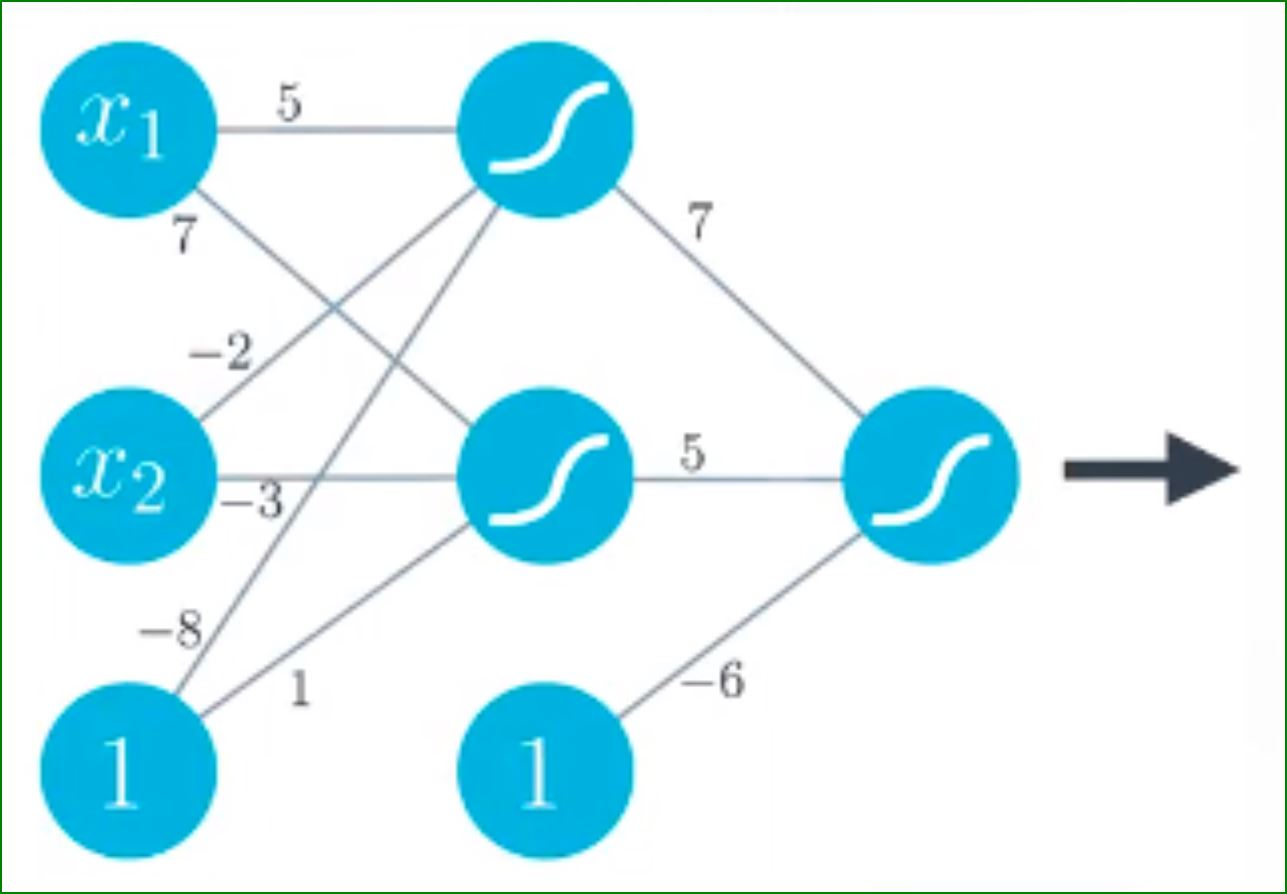

In [54]:
# Red neuronal vectorizada con bias
class RedNeuronal1:
  def __init__(self, Wc1, Wc2):        
    self.Wc1 = Wc1
    self.Wc2 = Wc2
  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1.T)) 
    A = np.insert(A, 2, np.ones(len(A)), axis=1).astype(np.float32)
    print(A)
    y_aprox = sigmoid(np.matmul(A,self.Wc2)) 
    return y_aprox[0]

In [55]:
X1 = np.array([[1,1,1]])

Wc1 = np.array([[5,-2,-8], [7,-3,1]])

Wc2 = np.array([7,5,-6])

modelo1 = RedNeuronal1(Wc1, Wc2)
y_aprox_m1 = modelo1.forward_propagation(X1)

print("y_aprox: {}".format(y_aprox_m1))

[[0.00669285 0.9933072  1.        ]]
y_aprox: 0.2715813595780128


Se obtiene que la carácteristica con mayor presencia es la segunda, ya que posee un valor de **0.9933072** y la salida del modelo con valores iniciales x_1 = 1 y x_2 = 2 es de **0.2715813595780128**.

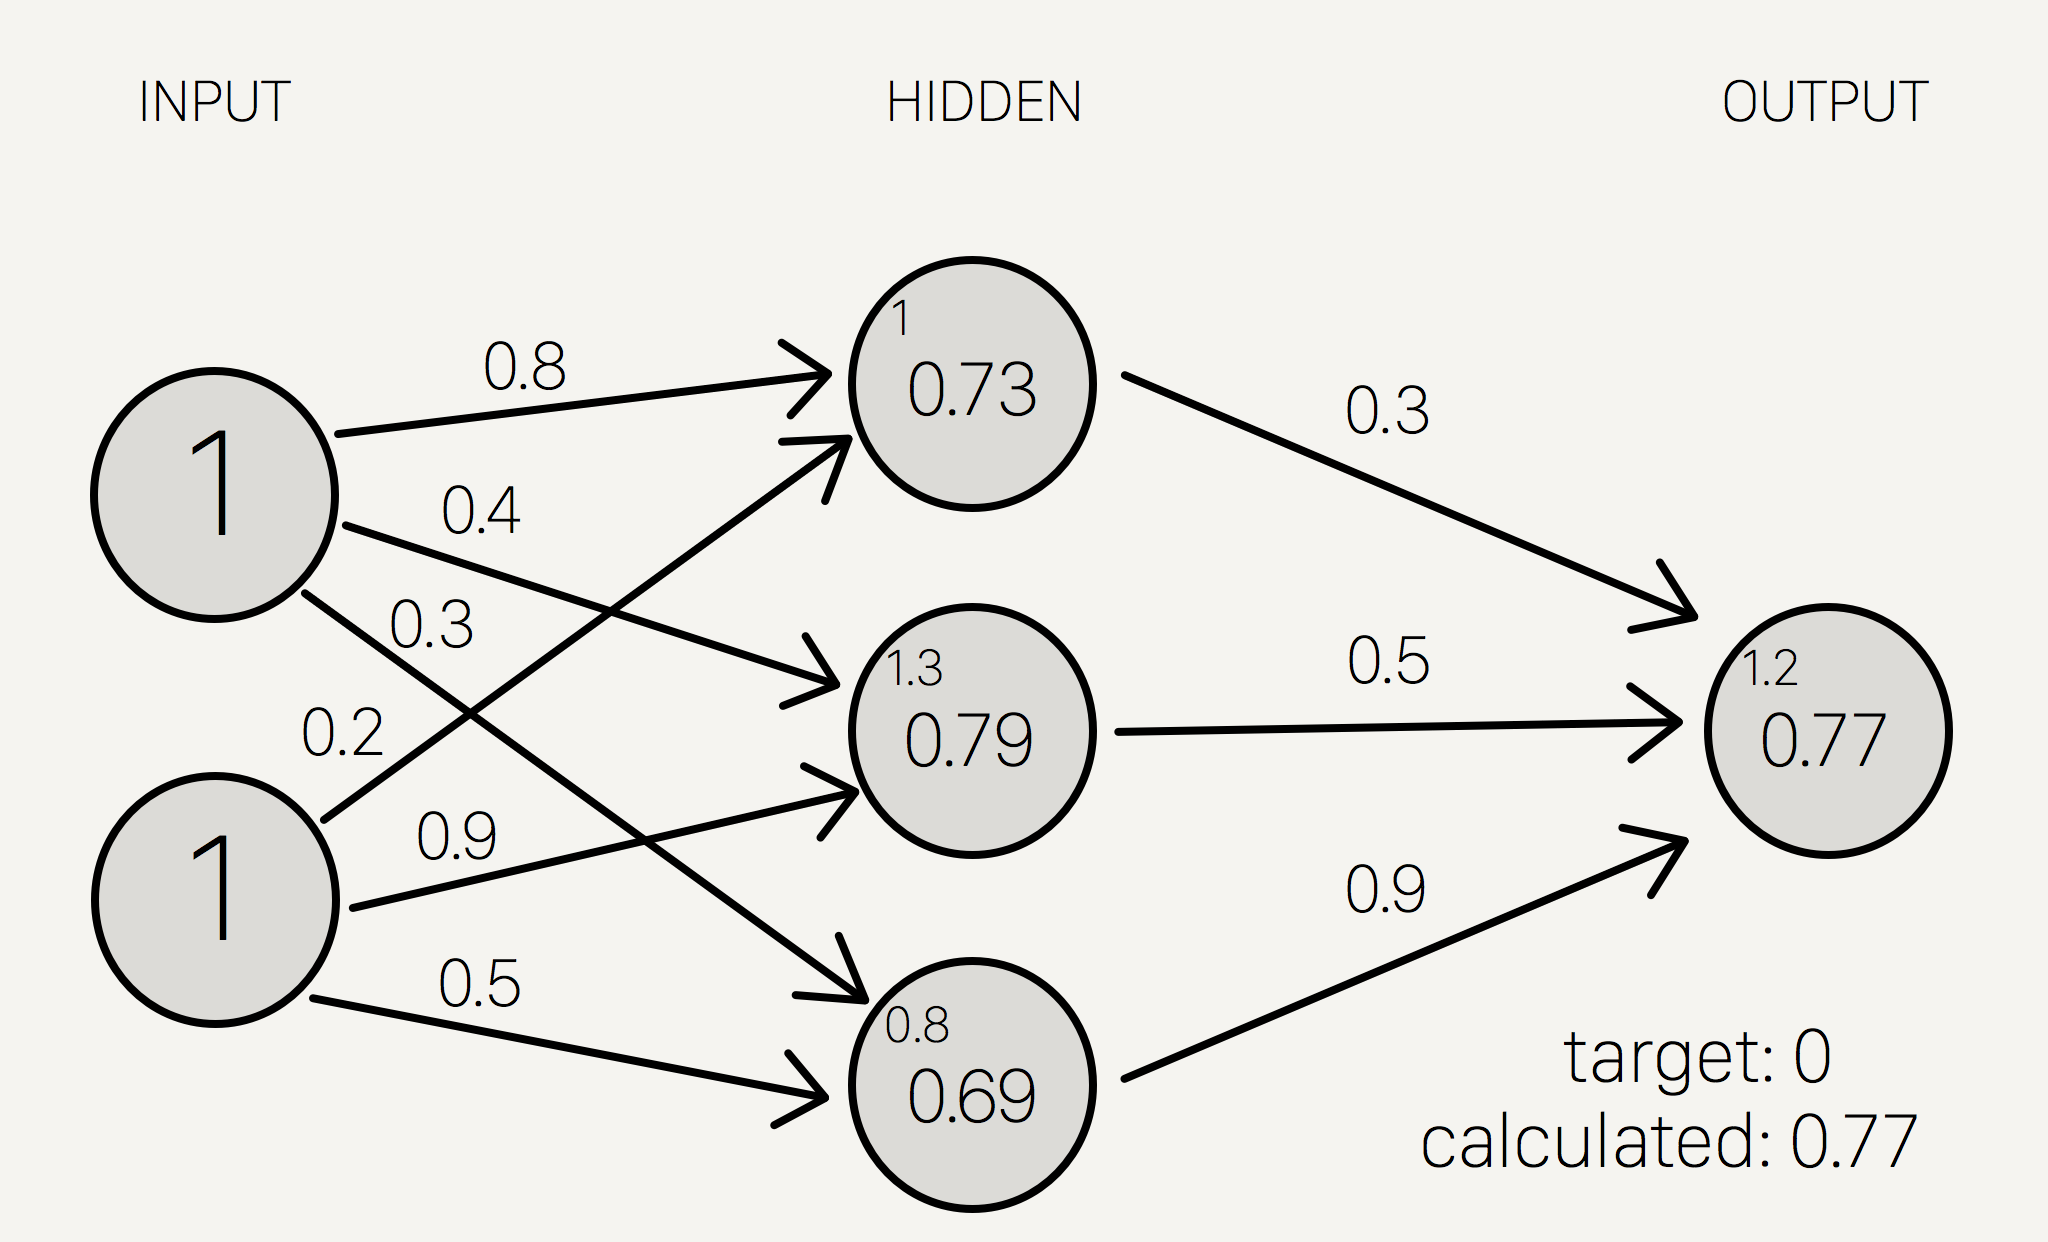

In [56]:
# Red neuronal Vectorizada sin bias
class RedNeuronal2:
  def __init__(self, Wc1, Wc2):        
    self.Wc1 = Wc1
    self.Wc2 = Wc2

  def forward_propagation(self, X):
    A = sigmoid(np.matmul(X,self.Wc1.T)) 
    print(A)
    y_aprox = sigmoid(np.matmul(A,self.Wc2)) 
    return y_aprox[0]

In [57]:
X2 = np.array([[1,1]])

Wc1 = np.array([[0.8,0.2], [0.4,0.9], [0.3,0.5]])

Wc2 = np.array([0.3,0.5,0.9])

modelo2 = RedNeuronal2(Wc1, Wc2)
y_aprox_m2 = modelo2.forward_propagation(X2)

print("y_aprox: {}".format(y_aprox_m2))

[[0.73105858 0.78583498 0.68997448]]
y_aprox: 0.7743802720529458


Se obtiene que la carácteristica con mayor presencia es la segunda, ya que posee un valor de **0.78583498** y la salida del modelo con valores iniciales x_1 = 1 y x_2 = 2 es de **0.7743802720529458**.

### Revisitando la función Xor
- Calcular para cada posible punto en el dominio de xor la salida intermedia H = [h1,h2]
- Mostrar la matriz resultante H en el notebook.
- Graficar cada punto de la representación intermedia(scatter), usar diferente color y/o marker según su etiqueta Y.
- Analizar el resultado intermedio, concluir y comentar opiniones.

In [78]:
# Valores posibles para XOR
X3 = np.array([[1,1], [1,0], [0,1], [0,0]])

In [79]:
Wc1 = np.array([[20,20,-10],[-20,-20,30]])
Wc2 = np.array([20,20,-30])

In [106]:
# Red neuronal vectorizada con bias
class RedNeuronal3:
  def __init__(self, Wc1, Wc2):        
    self.Wc1 = Wc1
    self.Wc2 = Wc2
  def forward_propagation(self,X):
    X = np.append(X, np.ones((X.shape[0], 1)), axis = -1)
    A = sigmoid(np.matmul(X,self.Wc1.T)) 
    H = np.insert(A, 2, np.ones(len(A)), axis=1).astype(np.float32)
    print("H: \n{}".format(H))
    y_aprox = sigmoid(np.matmul(H,self.Wc2)) 
    return y_aprox, H

In [107]:
xor_modelo = RedNeuronal3(Wc1, Wc2)
y_aprox_xor, H = xor_modelo.forward_propagation(X3)
print("\ny_aprox: {}".format(y_aprox_xor))

H: 
[[1.000000e+00 4.539787e-05 1.000000e+00]
 [9.999546e-01 9.999546e-01 1.000000e+00]
 [9.999546e-01 9.999546e-01 1.000000e+00]
 [4.539787e-05 1.000000e+00 1.000000e+00]]

y_aprox: [4.54391049e-05 9.99954520e-01 9.99954520e-01 4.54391049e-05]


Text(0, 0.5, 'H_2')

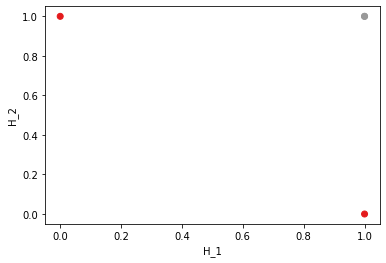

In [109]:
plt.scatter(H[:,0],H[:,1], c=y_aprox_xor, cmap='Set1')
plt.xlabel("H_1")
plt.ylabel("H_2")

### Conclusiones

- Se obtiene que con una red neuronal de 2 capas es posible crear un perceptron multicapa que aproxime la función XOR.
- La representación intermedia de la capa oculta, muestra un espacio en el que las dos clases son linealmente separables, lo cual permite que el perceptron multicapa logre asignar el resultado correcto a todas las posibles entradas de la función XOR.
- Las operaciones entre los datos de entrada y los parámetros del modelo se pueden considerar o interpretar como transformaciones lineales.
